<a href="https://colab.research.google.com/github/Erika000o/Redes-Neuronales/blob/main/redUnidereccional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Paso 1. Importar las bibliotecas necesarias


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from matplotlib import pyplot as plt

#Paso 2 Cargar el conjunto de datos MNIST

In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#Normalizar los valores de pixeles entre 0 y 1

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

#Paso 3: Contruir el modelo unidireccional (Freedforward)

In [5]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Aplanar las imágenes 28x28 en vectores de 784 elementos
    layers.Dense(128, activation='relu'),  # Capa densa con 128 neuronas y función de activación ReLU
    layers.Dense(10, activation='softmax') # Capa de salida con 10 neuronas (una por dígito), usando softmax
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#Paso 4: Compilar el modelo

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Paso 5: Entrenar el modelo




In [7]:
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8784 - loss: 0.4366 - val_accuracy: 0.9619 - val_loss: 0.1353
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9647 - loss: 0.1199 - val_accuracy: 0.9676 - val_loss: 0.1052
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9765 - loss: 0.0793 - val_accuracy: 0.9677 - val_loss: 0.1003
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9831 - loss: 0.0568 - val_accuracy: 0.9745 - val_loss: 0.0815
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9872 - loss: 0.0439 - val_accuracy: 0.9733 - val_loss: 0.0909


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nPrecisión en el conjunto de prueba: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9700 - loss: 0.1040

Precisión en el conjunto de prueba: 0.9732999801635742


#Visualizar la presicion durante el entrenamiento

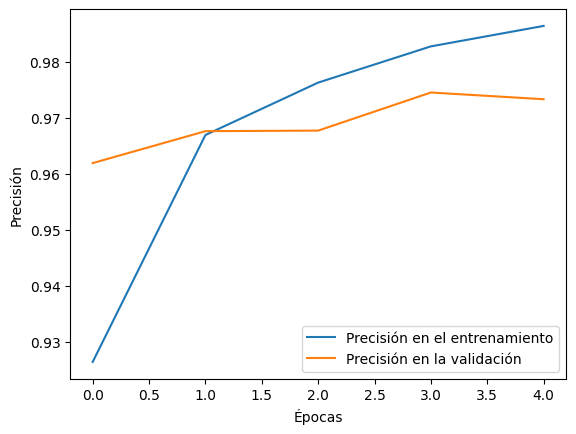

In [9]:
plt.plot(history.history['accuracy'], label='Precisión en el entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en la validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.show()